# FDA_hw3

## Logistic Regression



In [1]:
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics, model_selection
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
train = pd.read_csv('training.csv')
test = pd.read_csv('test.csv')
train.head()

,Date,Open Price,Close Price,High Price,Low Price,Volume
0,02-Jan-2009,902.99,931.80,934.73,899.35,4048270080
1,05-Jan-2009,929.17,927.45,936.63,919.53,5413910016
2,06-Jan-2009,931.17,934.70,943.85,927.28,5392620032
3,07-Jan-2009,927.45,906.65,927.45,902.37,4704940032
4,08-Jan-2009,905.73,909.73,910.00,896.81,4991549952


In [3]:
train['Tomorrow Close Price'] = train['Close Price'].shift(-1)
test['Tomorrow Close Price'] = test['Close Price'].shift(-1)
test.head()

,Date,Open Price,Close Price,High Price,Low Price,Volume,Tomorrow Close Price
0,02-Jan-2018,2683.73,2695.81,2695.89,2682.36,1846463232,2713.06
1,03-Jan-2018,2697.85,2713.06,2714.37,2697.77,2090595328,2723.99
2,04-Jan-2018,2719.31,2723.99,2729.29,2719.07,2100767744,2743.15
3,05-Jan-2018,2731.33,2743.15,2743.45,2727.92,1918869120,2747.71
4,08-Jan-2018,2742.67,2747.71,2748.51,2737.60,1894823936,2751.29


In [4]:
def f(x):
    if x[1] > x[0]:
        return 1
    return 0

train['Tomorrow Increase'] = train[['Close Price', 'Tomorrow Close Price']].apply(f, axis=1)
test['Tomorrow Increase'] = test[['Close Price', 'Tomorrow Close Price']].apply(f, axis=1)
train.head(10)

,Date,Open Price,Close Price,High Price,Low Price,Volume,Tomorrow Close Price,Tomorrow Increase
0,02-Jan-2009,902.99,931.80,934.73,899.35,4048270080,927.45,0
1,05-Jan-2009,929.17,927.45,936.63,919.53,5413910016,934.70,1
2,06-Jan-2009,931.17,934.70,943.85,927.28,5392620032,906.65,0
3,07-Jan-2009,927.45,906.65,927.45,902.37,4704940032,909.73,1
4,08-Jan-2009,905.73,909.73,910.00,896.81,4991549952,890.35,0
5,09-Jan-2009,909.91,890.35,911.93,888.31,4716499968,870.26,0
6,12-Jan-2009,890.40,870.26,890.40,864.32,4725049856,871.79,1
7,13-Jan-2009,869.79,871.79,877.02,862.02,5017469952,842.62,0
8,14-Jan-2009,867.28,842.62,867.28,836.93,5407880192,843.74,1
9,15-Jan-2009,841.99,843.74,851.59,817.04,7807350272,850.12,1


In [5]:
train = train.drop(['Date', 'Tomorrow Close Price'], axis=1)
test = test.drop(['Date', 'Tomorrow Close Price'], axis=1)
train.head()

,Open Price,Close Price,High Price,Low Price,Volume,Tomorrow Increase
0,902.99,931.80,934.73,899.35,4048270080,0
1,929.17,927.45,936.63,919.53,5413910016,1
2,931.17,934.70,943.85,927.28,5392620032,0
3,927.45,906.65,927.45,902.37,4704940032,1
4,905.73,909.73,910.00,896.81,4991549952,0


In [6]:
col = 'Tomorrow Increase'
x_train = train.loc[:, train.columns != col]
y_train = train[col]
x_test = test.loc[:, test.columns != col]
y_test = test[col]
x_train.head(10)

,Open Price,Close Price,High Price,Low Price,Volume
0,902.99,931.80,934.73,899.35,4048270080
1,929.17,927.45,936.63,919.53,5413910016
2,931.17,934.70,943.85,927.28,5392620032
3,927.45,906.65,927.45,902.37,4704940032
4,905.73,909.73,910.00,896.81,4991549952
5,909.91,890.35,911.93,888.31,4716499968
6,890.40,870.26,890.40,864.32,4725049856
7,869.79,871.79,877.02,862.02,5017469952
8,867.28,842.62,867.28,836.93,5407880192
9,841.99,843.74,851.59,817.04,7807350272


In [7]:
x_train_std = x_train
x_train_std = (x_train_std - x_train_std.mean()) / x_train_std.std()
x_test_std = x_test
x_test_std = (x_test_std - x_test_std.mean()) / x_test_std.std()
x_train_std.head()

,Open Price,Close Price,High Price,Low Price,Volume
0,-1.551957,-1.494082,-1.505124,-1.540593,0.813446
1,-1.498010,-1.503047,-1.501205,-1.499034,1.823778
2,-1.493889,-1.488105,-1.486312,-1.483074,1.808027
3,-1.501555,-1.545913,-1.520140,-1.534374,1.299265
4,-1.546311,-1.539566,-1.556133,-1.545824,1.511306


In [8]:
def evaluate(model, x_train, y_train, x_test, y_test):
    train_preds = model.predict(x_train)
    test_preds = model.predict(x_test)
    train_acc = metrics.accuracy_score(y_train, train_preds)
    test_acc = metrics.accuracy_score(y_test, test_preds)
    print('Train accuracy: %s' % train_acc)
    print('Test accuracy: %s' % test_acc)
    print(test_preds)

In [9]:
model_bl = linear_model.SGDClassifier(loss='log', max_iter=10000, tol=1e-3,
                                      learning_rate='adaptive', eta0=0.87)
model_bl.fit(x_train, y_train)
evaluate(model_bl, x_train_std, y_train, x_test_std, y_test)

Train accuracy: 0.5163427561837456
Test accuracy: 0.5674603174603174
[1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [10]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(x_train, y_train)
evaluate(clf, x_train_std, y_train, x_test_std, y_test)

Train accuracy: 0.4916077738515901
Test accuracy: 0.4444444444444444
[0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0
 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1
 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0]


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## SVM

In [11]:
from sklearn import datasets

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

x_train_std = scaler.transform(x_train)
x_test_std = scaler.transform(x_test)
x_test_std

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


array([[ 2.11792884,  2.14183026,  2.1280369 ,  2.13182543, -0.81568088],
       [ 2.14703114,  2.17738855,  2.16616345,  2.16356794, -0.6350265 ],
       [ 2.19126169,  2.1999191 ,  2.19694528,  2.20744305, -0.62749905],
       ...,
       [ 1.62073705,  1.71517201,  1.7014033 ,  1.54595882, -0.41608606],
       [ 1.73671343,  1.70880244,  1.76571091,  1.70034565, -0.64232918],
       [ 1.73706381,  1.75231754,  1.74295464,  1.7208001 , -0.76668134]])

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
'''
# Custom kernel function
def my_kernel(X, Y):
    return np.dot(X, Y.T)
  
penalty = 0.05

svm = SVC(C=penalty, kernel="linear", probability=True)
svm.fit(x_train, y_train)
  
acc_rate = accuracy_score(y_test, svm.predict(x_test)) * 100
print("Penalty = %.2f, Accuracy = %.2f %%" % (penalty, acc_rate))
'''

'\n# Custom kernel function\ndef my_kernel(X, Y):\n    return np.dot(X, Y.T)\n  \npenalty = 0.05\n\nsvm = SVC(C=penalty, kernel="linear", probability=True)\nsvm.fit(x_train, y_train)\n  \nacc_rate = accuracy_score(y_test, svm.predict(x_test)) * 100\nprint("Penalty = %.2f, Accuracy = %.2f %%" % (penalty, acc_rate))\n'

## Neural Network

In [14]:
from keras import models, layers, optimizers, regularizers
import random
from sklearn import preprocessing
import tensorflow as tf
from tqdm import tqdm

Using TensorFlow backend.


In [15]:
y_train.value_counts()

1    1236
0    1028
Name: Tomorrow Increase, dtype: int64

In [16]:
y_test.value_counts()

1    131
0    121
Name: Tomorrow Increase, dtype: int64

In [17]:
input_dimension = 5
hidden_units = 10    # how many neurons in the hidden layer
activation = 'relu'  # activation function for hidden layer
l2 = 0.001           # regularization - how much we penalize large parameter values
learning_rate = 0.1  # how big our steps are in gradient descent
epochs = 20          # how many epochs to train for
batch_size = 32      # how many samples to use for each gradient descent update

In [18]:
# create a sequential model
model = models.Sequential()
# add the hidden layer
model.add(layers.Dense(input_dim=input_dimension,
                       units=hidden_units, 
                       activation=activation))
# add the output layer
model.add(layers.Dense(input_dim=hidden_units,
                       units=1,
                       activation='sigmoid'))
# define our loss function and optimizer
# Adam is a kind of gradient descent
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [19]:
# train the parameters
history = model.fit(x_train_std, y_train, epochs=10, batch_size=batch_size)

# evaluate accuracy
train_acc = model.evaluate(x_train_std, y_train, batch_size=32)[1]
test_acc = model.evaluate(x_test_std, y_test, batch_size=32)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
2264/2264 [==============================] - 0s 147us/step - loss: 0.7079 - acc: 0.5177
Epoch 2/10
2264/2264 [==============================] - 0s 50us/step - loss: 0.6907 - acc: 0.5239
Epoch 3/10
2264/2264 [==============================] - 0s 49us/step - loss: 0.6905 - acc: 0.5362
Epoch 4/10
2264/2264 [==============================] - 0s 49us/step - loss: 0.6914 - acc: 0.5424
Epoch 5/10
2264/2264 [==============================] - 0s 50us/step - loss: 0.6921 - acc: 0.5345
Epoch 6/10
2264/2264 [==============================] - 0s 55us/step - loss: 0.6901 - acc: 0.5459
Epoch 7/10
2264/2264 [==============================] - 0s 50us/step - loss: 0.6911 - acc: 0.5459
Epoch 8/10
2264/2264 [==============================] - 0s 53us/step - loss: 0.6912 - acc: 0.5309
Epoch 9/10
2264/2264 [==============================] - 0s 50us/step - loss: 0.6916 - acc: 0.5380
Epoch 10/10
252/252 [==============================] - 0s 30us/step
T

In [20]:
model.predict(x_test_std)

array([[0.50003296],
       [0.50003296],
       [0.50003296],
       [0.50003296],
       [0.50003296],
       [0.50003296],
       [0.50003296],
       [0.50003296],
       [0.50003296],
       [0.50003296],
       [0.50003296],
       [0.50003296],
       [0.50003296],
       [0.50003296],
       [0.50003296],
       [0.50003296],
       [0.50003296],
       [0.50003296],
       [0.50003296],
       [0.50003296],
       [0.50003296],
       [0.50003296],
       [0.50003296],
       [0.50003296],
       [0.50003296],
       [0.50003296],
       [0.50003296],
       [0.50003296],
       [0.50003296],
       [0.50003296],
       [0.50003296],
       [0.50003296],
       [0.50003296],
       [0.50003296],
       [0.50003296],
       [0.50003296],
       [0.50003296],
       [0.50003296],
       [0.50003296],
       [0.50003296],
       [0.50003296],
       [0.50003296],
       [0.50003296],
       [0.50003296],
       [0.50003296],
       [0.50003296],
       [0.50003296],
       [0.500

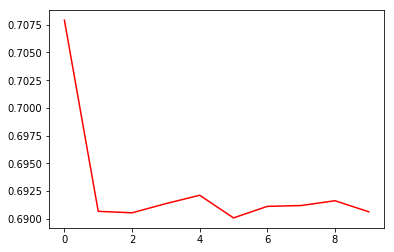

In [21]:
losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

In [22]:
def train_and_evaluate(model, x_train, y_train, x_test, y_test, n=20):
    train_accs = []
    test_accs = []
    with tqdm(total=n) as progress_bar:
        for _ in range(n):
            model.fit(x_train, y_train, epochs=epochs, 
                      batch_size=batch_size, verbose=False)
            train_accs.append(model.evaluate(x_train, y_train, batch_size=32, verbose=False)[1])
            test_accs.append(model.evaluate(x_test, y_test, batch_size=32, verbose=False)[1])
            progress_bar.update()
    print('Avgerage Training Accuracy: %s' % np.average(train_accs))
    print('Avgerage Testing Accuracy: %s' % np.average(test_accs))
    return train_accs, test_accs

In [23]:
train_accs, test_accs = train_and_evaluate(model, x_train_std, y_train, x_test_std, y_test)

100%|██████████| 20/20 [00:32<00:00,  1.56s/it]

Avgerage Training Accuracy: 0.5413427562943195
Avgerage Testing Accuracy: 0.5178571434484589


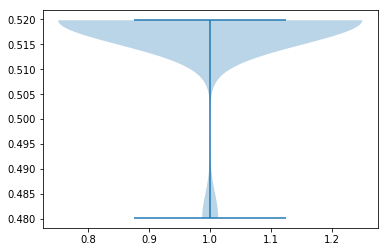

In [24]:
plt.violinplot(test_accs)
plt.show()

In [26]:
print('Max: %s' % np.max(test_accs))
print('Min: %s' % np.min(test_accs))

Max: 0.5198412703143226
Min: 0.4801587329970466


## Discussion

### How did you preprocess this dataset ?


### Which classifier reaches the highest classification accuracy in this dataset ?


#### Why ?


#### Can this result remain if the dataset is different ?


### How did you improve your classifiers ?
